In [1]:
import pandas as pd
import ta

In [2]:
df = pd.read_csv('/Users/ljp2/trade/Data/bars1/20211207.csv')
# df = pd.read_csv('/Users/ljp2/trade/Data/bars1/20210602.csv')

In [3]:
x = ta.trend.IchimokuIndicator(df.high, df.low)

In [4]:
df['B'] = x.ichimoku_b()

In [5]:
v = 0
vp = 0
vwap = []
for index, row in df.iterrows():
    v += row.volume
    vp += row.volume * row.wap
    vwap.append( vp / v)
df['vwap'] = vwap

<AxesSubplot:>

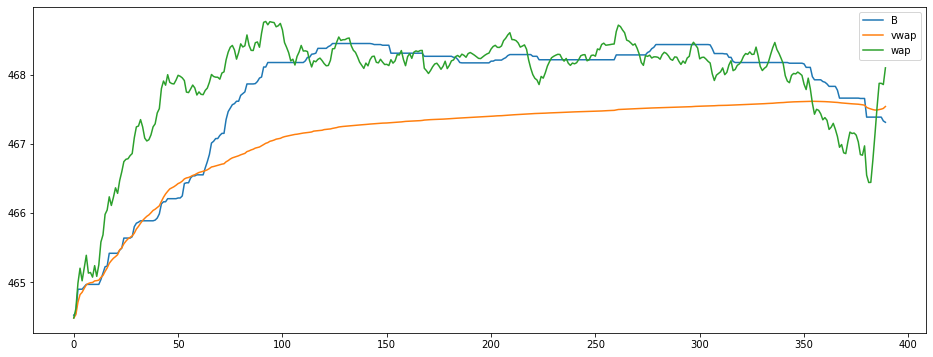

In [6]:
df.plot(y=['B', 'vwap', 'wap'], figsize=(16,6))

<AxesSubplot:>

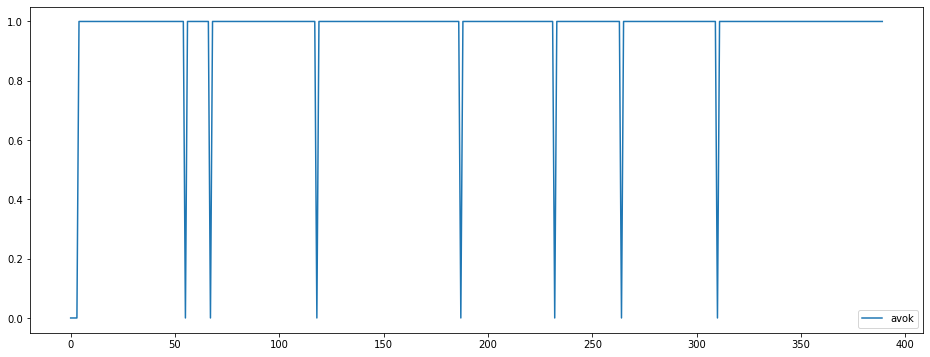

In [7]:
df['av'] = ta.trend.EMAIndicator(df.volume, 5).ema_indicator()
df['avok'] = (df.volume > 0.5 * df.av).astype('int')
df.plot(y = 'avok', figsize=(16,6))